In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing
import numpy as np

In [28]:
plt.style.use('fivethirtyeight')

In [2]:
df = pd.read_csv('../data/cleaned.csv')


In [4]:
df.loc[15,'word'] = 'probe'
df.loc[35,'word'] = 'clean'
df.loc[246,'word'] = 'trash'
df.loc[353,'word'] = 'favor'
df.loc[20,'word'] = 'naive'

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["day_of_week"] = df["date"].dt.dayofweek

In [6]:
df["day_of_week"] = df["date"].dt.dayofweek
print(df)

     Unnamed: 0       date  contest_num   word  num_results  num_hardmode  \
0             0 2022-12-31          560  manly        20380          1899   
1             1 2022-12-30          559  molar        21204          1973   
2             2 2022-12-29          558  havoc        20001          1919   
3             3 2022-12-28          557  impel        20160          1937   
4             4 2022-12-27          556  condo        20879          2012   
..          ...        ...          ...    ...          ...           ...   
354         354 2022-01-11          206  drink       153880          3017   
355         355 2022-01-10          205  query       107134          2242   
356         356 2022-01-09          204  gorge        91477          1913   
357         357 2022-01-08          203  crank       101503          1763   
358         358 2022-01-07          202  slump        80630          1362   

     in1  in2  in3  in4  ...  letter3  letter4  letter5  letter1_int  \
0  

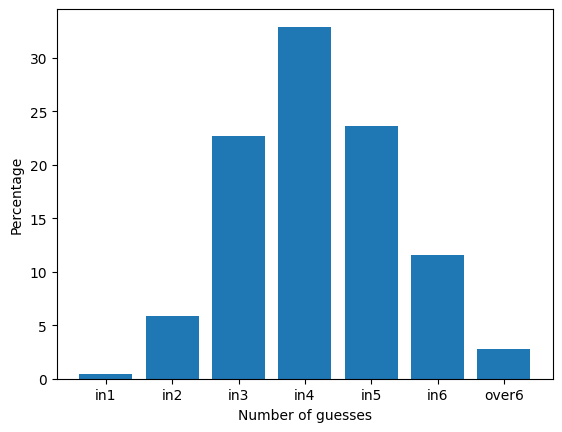

In [7]:
fig, ax = plt.subplots()

guesses = ['in1', 'in2', 'in3', 'in4', 'in5', 'in6', 'over6']

percentages = np.array([df['in1'], df['in2'], df['in3'], df['in4'], df['in5'], df['in6'], df['over6']])

ax.bar(guesses, percentages.mean(axis=1))

ax.set_xlabel('Number of guesses')
ax.set_ylabel('Percentage')


plt.show()

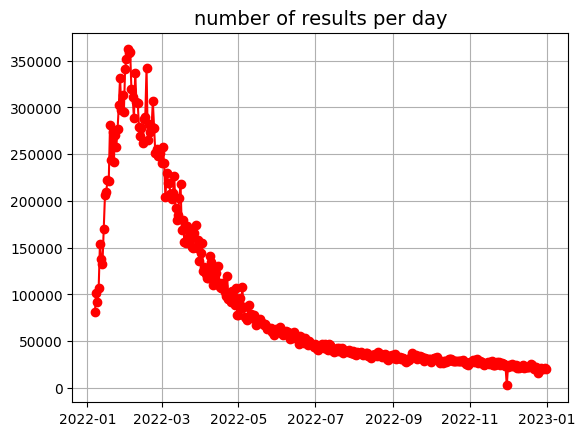

In [8]:
plt.plot(df['date'], df['num_results'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


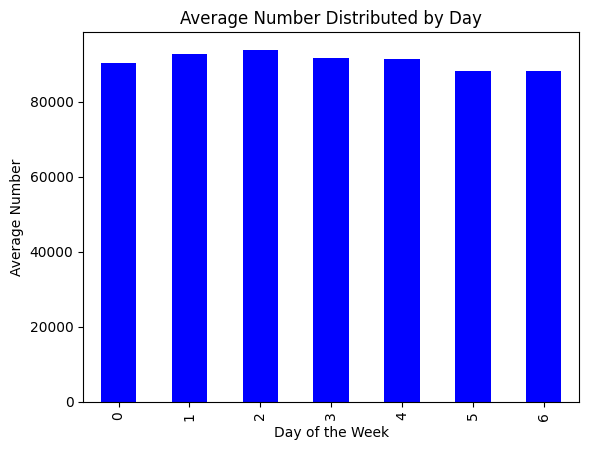

In [9]:
grouped = df.groupby('day_of_week')['num_results'].mean()

# Plot a bar chart with the grouped data
grouped.plot(kind='bar', color='blue')

# Add labels and title to the plot
plt.xlabel('Day of the Week')
plt.ylabel('Average Number')
plt.title('Average Number Distributed by Day')
plt.show()


In [ ]:
from prophet import Prophet

df_numpeople_predict = df[["date", "num_results"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()



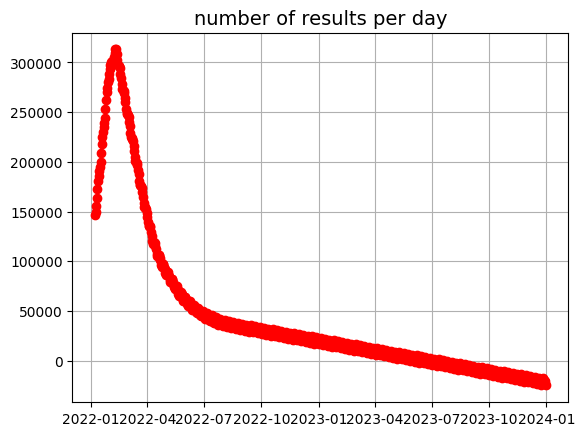

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,13254.302233,-51717.679558,76539.047891,-54172.958964,73121.999817,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,3214.369696,0.0,0.0,0.0,16468.671929


In [ ]:
plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


23:07:22 - cmdstanpy - INFO - Chain [1] start processing
23:07:22 - cmdstanpy - INFO - Chain [1] done processing


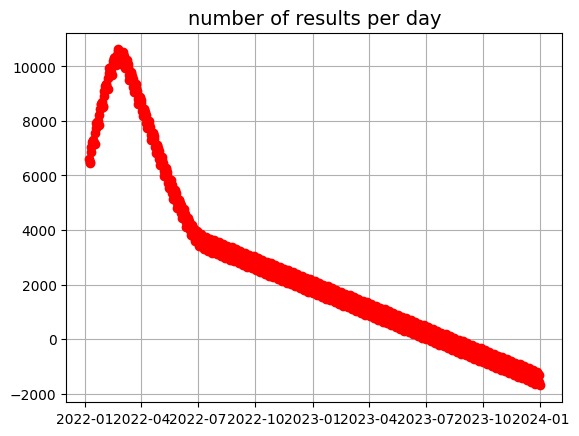

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
418,2023-03-01,1428.631998,-280.831668,3492.747908,519.722721,2359.518165,175.957446,175.957446,175.957446,175.957446,175.957446,175.957446,0.0,0.0,0.0,1604.589444


In [ ]:
df_numpeople_predict = df[["date", "num_hardmode"]]
df_numpeople_predict.columns = ['ds', 'y']
m = Prophet()
m.fit(df_numpeople_predict)

future = m.make_future_dataframe(periods=365)

forecast = m.predict(future)
forecast.tail()

plt.plot(forecast['ds'], forecast['yhat'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()

forecast[forecast.ds == "2023-03-01"]


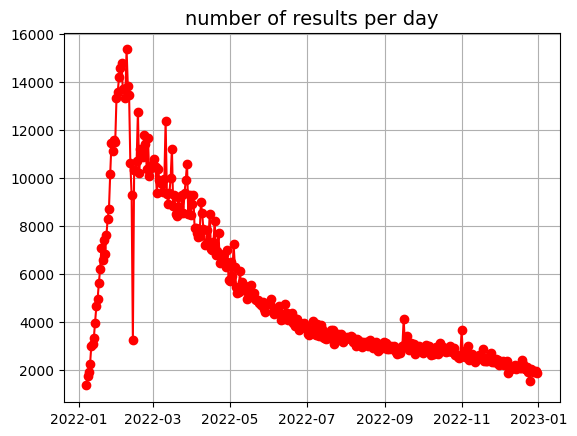

In [ ]:
plt.plot(df['date'], df['num_hardmode'], color='red', marker='o')
plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


In [12]:
print(df)

     Unnamed: 0       date  contest_num   word  num_results  num_hardmode  \
0             0 2022-12-31          560  manly        20380          1899   
1             1 2022-12-30          559  molar        21204          1973   
2             2 2022-12-29          558  havoc        20001          1919   
3             3 2022-12-28          557  impel        20160          1937   
4             4 2022-12-27          556  condo        20879          2012   
..          ...        ...          ...    ...          ...           ...   
354         354 2022-01-11          206  drink       153880          3017   
355         355 2022-01-10          205  query       107134          2242   
356         356 2022-01-09          204  gorge        91477          1913   
357         357 2022-01-08          203  crank       101503          1763   
358         358 2022-01-07          202  slump        80630          1362   

     in1  in2  in3  in4  ...  letter3  letter4  letter5  letter1_int  \
0  

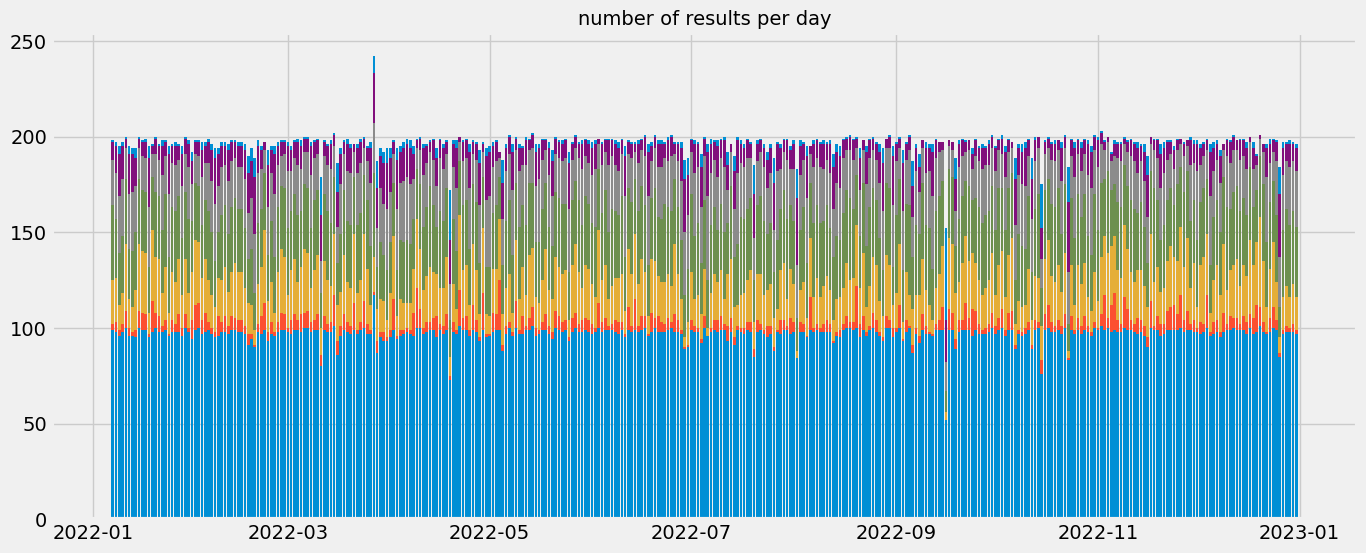

In [29]:
plt.figure(figsize=(15,6))
plt.bar(df['date'], df['in1'])
bottom=df.in1
plt.bar(df['date'], df['in2'], bottom=bottom)
bottom+=df.in2
plt.bar(df['date'], df['in3'], bottom=bottom)
bottom+=df.in3
plt.bar(df['date'], df['in4'],bottom=bottom)
bottom+=df.in4
plt.bar(df['date'], df['in5'],bottom=bottom)
bottom+=df.in5
plt.bar(df['date'], df['in6'], bottom=bottom)
bottom+=df.in6
plt.bar(df['date'], df['over6'],bottom=bottom)

plt.title('number of results per day', fontsize=14)
plt.grid(True)
plt.show()


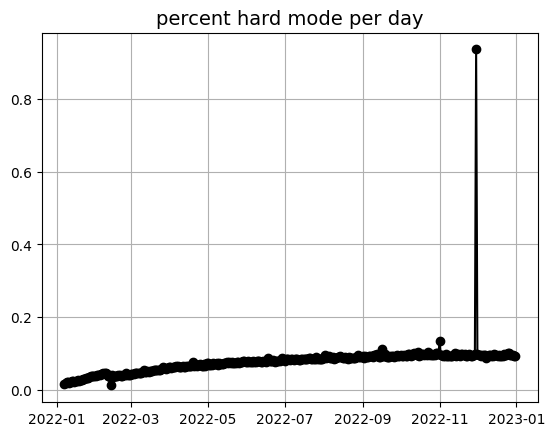

,Unnamed: 0,date,contest_num,word,num_results,num_hardmode,in1,in2,in3,in4,...,letter4,letter5,letter1_int,letter2_int,letter3_int,letter4_int,letter5_int,word_score,avg_num_guesses,percent_hard
31,31,2022-11-30,529,study,2569,2405,0,6,30,33,...,d,y,19,20,21,4,25,0.256991,4.03,0.936162


In [16]:
df["percent_hard"] = df.apply(
    lambda row: row["num_hardmode"]/row["num_results"], axis=1)

plt.plot(df['date'], df['percent_hard'], color='black', marker='o')
plt.title('percent hard mode per day', fontsize=14)
plt.grid(True)
plt.show()


df[df["percent_hard"] > 0.5]


In [19]:
from sklearn.cluster import KMeans
import matplotlib.dates as dates
df_kmeans = df[["word_score", "avg_num_guesses", "percent_hard"]]

kmeans = KMeans(n_clusters=3).fit(df_kmeans)

# Predict the cluster labels for each data point
labels = kmeans.predict(df_kmeans)

# Add the cluster labels to the data
df_kmeans['cluster'] = labels

# Print the summary statistics for each cluster
for i in range(3):
    cluster_data = df_kmeans[df_kmeans['cluster'] == i]
    print('Cluster', i)
    print('Mean number of word score results:',
          cluster_data['word_score'].mean())
    print('Mean percentage of players on hard mode:',
          cluster_data['percent_hard'].mean())
    print('Mean average number of guesses:',
          cluster_data['avg_num_guesses'].mean())
    print('\n')


Cluster 0
Mean number of word score results: 0.28152215603547465
Mean percentage of players on hard mode: 0.08050022328126456
Mean average number of guesses: 4.214244186046511


Cluster 1
Mean number of word score results: 0.29529475405106503
Mean percentage of players on hard mode: 0.07351873316622652
Mean average number of guesses: 3.7691964285714286


Cluster 2
Mean number of word score results: 0.26148627846965106
Mean percentage of players on hard mode: 0.07720776353232975
Mean average number of guesses: 4.773999999999999




c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Admin\AppData\Local\Temp\ipykernel_26096\3515965555.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kmeans['cluster'] = labels


In [36]:
from scipy import stats
import numpy as np

# assuming your data is stored in a numpy array called "data"
# and the columns are ordered 1, 2, 3, ..., 7+

# calculate the Shapiro-Wilk test statistic and p-value
x = df[['in1','in2','in3','in4','in5','in6','over6']]

x = x.values.flatten()
result = stats.anderson(x, dist='gumbel')
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))


Statistic: 99.549
25.000: 0.472, data does not look normal (reject H0)
10.000: 0.634, data does not look normal (reject H0)
5.000: 0.754, data does not look normal (reject H0)
2.500: 0.874, data does not look normal (reject H0)
1.000: 1.034, data does not look normal (reject H0)
